Abstract

This project is ment to answer 3 questions. the first question is the recreation of the direct passage of two galaxies, that is when two 2D galaxies come together in the direction of the spin of the relative "fixed" galaxy. The second question  will be the S3+ initial conditions and the third will be the S5 initial conditions. For the first recreation i will be attempting to form a derivs equation using the two second derivative functions that were prvided and that are listed below then using a version of the odeint function will attempt to get two sets of points describing the relative postions of the point masses around the stationary galaxy and the postition of the moving galaxy in relation to the stationary one. Both the second and third questions will begin with variations on the original derivative function using different initial values to prove the other questions. I have been having some trouble getting started on this project any feedback at all would be very welcome.

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed
import Equation_Sheet as es
gamma=4.5e-8

My first question is a recreation of the direct passage in the aritcle. This will (hopefully) recreate the static images in the paper as well as create moving plots to showcase the actuall happenings not evident in the static images. The second question is almost the same as the original question but the initial conditions have been changed and adapted to a new situation as is the third question.

$$ \ddot{\mathbf{r}} = -\gamma \left\{ \frac{M}{r^3}\mathbf{r} -\frac{S}{\rho^3}\boldsymbol{\rho} + \frac{S}{R^3}\boldsymbol\Re \right\} $$

$$ \ddot{\boldsymbol\Re} = -\gamma \frac{M+S}{R^3}\boldsymbol\Re$$

In [221]:
"""Units:
    Length: Kiloparsecs
    Mass: Solar Units (1.99x10^(30)
    Time: Ages (100,000,000 yrs)"""

'Units:\n    Length: Kiloparsecs\n    Mass: Solar Units (1.99x10^(30)\n    Time: Ages (100,000,000 yrs)'

ivec=(x,dx,y,dy,X,dX,Y,dY)

In [222]:
def derivs2(ivec,t,M,S):
        x=ivec[0]
        vx=ivec[1]
        y=ivec[2]
        vy=ivec[3]
        
        X=ivec[4]
        Vx=ivec[5]
        Y=ivec[6]
        Vy=ivec[7]
        
        dx=vx
        dy=vy
        
        dX=Vx
        dY=Vy
        
        r=np.sqrt(x**2+y**2)
        R=np.sqrt(X**2+Y**2)      
        
        rho=np.sqrt((X-x)**2+(Y-y)**2)
        rhoy=Y-y
        rhox=X-x
        
        dvx = -gamma*((M/r**3)*x-(S/rho**3)*rhox+(S/R**3)*X)
        dVx = -gamma*((M+S)/R**3)*X
        
        dvy = -gamma*((M/r**3)*y-(S/rho**3)*rhoy+(S/R**3)*Y)
        dVy = -gamma*((M+S)/R**3)*Y
        return np.array([dx,dvx,dy,dvy,dX,dVx,dY,dVy])
    
print derivs2(np.array([1,2,3,4,5,6,7,8]),10,10,10)      


[  2.00000000e+00  -7.82111694e-09   4.00000000e+00  -3.76954385e-08
   6.00000000e+00  -7.06911317e-09   8.00000000e+00  -9.89675843e-09]


In [223]:
def sol(ic, max_t, ntimes, M, S):
    t = np.linspace(0.0, max_t, ntimes)
    s = odeint(derivs2, ic, t, args=(M,S))
    return s
#print sol(ic,1,500,1e2,1e2)

In [224]:
"""pass arrays to radii and nstars"""

'pass arrays to radii and nstars'

In [225]:
def generate_star_ics(M, radii, nstars):
#     radii = [0.1, 0.2, 0.3]
#     nstars = [10, 15, 20]
    ics = []
    for i in range(len(radii)):
        r = radii[i]
        N = nstars[i]
        theta = np.arange(0.0, 2.0*np.pi, 2.0*np.pi/N)
        for t in range(N):
            x = r*np.cos(theta[t])
            y = r*np.sin(theta[t])
            v = np.sqrt((gamma*M)/r)
            vx = -v*np.sin(theta[t])
            vy = v*np.cos(theta[t])
            ics.append(np.array([x,vx,y,vy]))
    return ics

In [226]:
#ics = generate_star_ics(1.0, [0.1,0.2,0.3,0.4,0.5], [10,20,30,40,50])

In [227]:
# x = [ic[0] for ic in ics]
# y = [ic[2] for ic in ics]

# plt.figure(figsize=(7,7))
# plt.scatter(x,y);

In [228]:
def angle(Y,r0):
    return np.arctan(2.0*r0/Y)

In [229]:
def generate_gala_ics(M,S,r0,m):
    Y = m*r0
    X = (-Y**2.0)/(4.0*r0)+r0
    V=np.sqrt(2.0*gamma*(M+S)/np.sqrt(X**2+Y**2))
    Vx = V*np.cos(angle(Y,r0))
    Vy = -V*np.sin(angle(Y,r0))
    return np.array([X,Vx,Y,Vy])

In [230]:
generate_gala_ics(1.0,1.0,25.0,3.0)

array([ -3.12500000e+01,   3.91628371e-05,   7.50000000e+01,
        -2.61085581e-05])

In [231]:
def make_stars(M,S,radii,nstars,r0,m):
    star_ics = generate_star_ics(M,radii,nstars) # [np.array([x,vx,y,vy]), np.array([]), ...]
    gala_ics = generate_gala_ics(M,S,r0,m) # np.array([X,Vx,Y,Vy])
    #ics[0] -> x, vx, y, vy
    starx = []
    stary = []
    for sic in star_ics:
        ic = np.hstack([sic, gala_ics])
#        print ic[0]
        result = sol( ic, 50.0, 500, M, S)
#        print result
        starx.append(result[:,0])
        stary.append(result[:,2])
        galax = result[:,4]
        galay = result[:,6]
    starx = np.transpose(np.array(starx))
    stary = np.transpose(np.array(stary))
    return starx, stary, galax, galay

In [232]:
def plot_solution(starx, stary, galax, galay, j, lim):
    px=np.linspace(-100,100,100)
    r0=25.0
    py=-px**2/(4.0*r0)+r0
    plt.plot(py,px)
    plt.scatter(starx[j],stary[j],color='b')
    plt.scatter(galax[j],galay[j],color='g')
    plt.scatter(0,0,color='r')
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)

In [233]:
M = 1e10
S = 1e10
radii= [5,10,15,20]
nstars= [10,15,20,30]
print(len(radii), len(nstars))
r0=25.0
m=3.0

(4, 4)


In [234]:
starx,stary,galax,galay=make_stars(M,S,radii,nstars,r0,m)

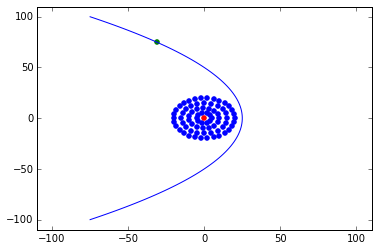

In [235]:
interact(plot_solution, starx=fixed(starx), stary=fixed(stary),
         galax=fixed(galax), galay=fixed(galay), j=(0,499), lim=(20,200,10));